In [1]:
from google.colab import files
uploaded = files.upload()


Saving sales_data.csv to sales_data.csv


In [2]:

!pip install pandas matplotlib


In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [4]:

df = pd.read_csv("sales_data.csv")


conn = sqlite3.connect("sales_data.db")
df.to_sql("sales", conn, if_exists="replace", index=False)


10000

In [5]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

summary_df = pd.read_sql_query(query, conn)


      product  total_qty  revenue
0     Charger       2895    72375
1  Headphones       2913   291300
2    Keyboard       3149   157450
3      Laptop       3190  2552000
4     Monitor       2855   571000
5       Mouse       3084    92520
6  Smartphone       2927  1756200
7     Speaker       3014   361680
8      Tablet       2934   880200
9      Webcam       3025   211750


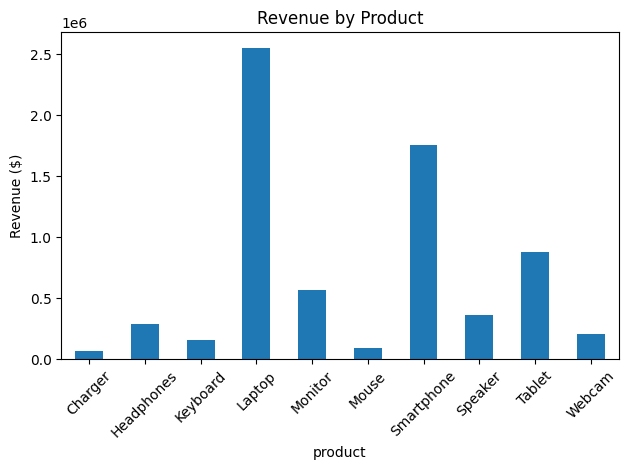

In [6]:
print(summary_df)


summary_df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
